In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

## Number of infected dataset

In [3]:
cc_data = pd.read_csv('cleaned_confirmed_cases.csv')
cc_data = pd.concat([cc_data,pd.get_dummies(cc_data['Country_Region'], prefix='country')],axis=1)
diff_split_cc_data = cc_data.copy()
# dropping first infection along with country and date
cc_data.drop(['Country_Region', 'Date', 'first_infection'],axis=1, inplace=True)
feature_cols = list(cc_data)
feature_cols.remove('TargetValue')
mask_test = (diff_split_cc_data['Date'] >= '2020-05-20')
mask_train = (diff_split_cc_data['Date'] < '2020-05-20')

In [4]:
test_cc_df = diff_split_cc_data.loc[mask_test]
train_cc_df = diff_split_cc_data.loc[mask_train]
y_time_split_cc = train_cc_df['TargetValue']
x_time_split_cc = train_cc_df[feature_cols] 

y_test_time_split_cc = test_cc_df['TargetValue']
x_test_time_split_cc = test_cc_df[feature_cols]

In [134]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_time_split_cc, y_time_split_cc)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [135]:
print(decision_tree.score(x_test_time_split_cc, y_test_time_split_cc))

0.9078375569097067


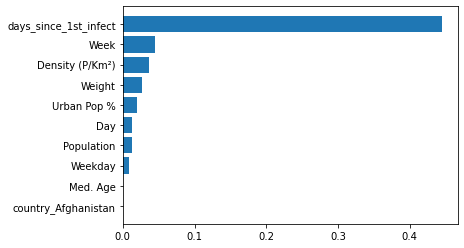

In [8]:
feature_imp = decision_tree.feature_importances_[:10]
sorted_idx = np.argsort(feature_imp)
pos = np.arange(sorted_idx.shape[0])+.5

plt.barh(pos, feature_imp[sorted_idx], align='center')
plt.yticks(pos, np.array(list(x_time_split_cc))[sorted_idx])
plt.show()

In [143]:
params = {
    'presort':[True, False],
    'criterion': ['friedman_mse', 'mse'],
    'min_impurity_decrease': list(np.logspace(np.log10(0.18), np.log10(0.5), base = 10, num = 800))#[1e-7, 1e-3, 1e-1, 0.0, 0.002, 0.03]
}

In [144]:
rand_search = RandomizedSearchCV(decision_tree, params, n_iter = 200)
search = rand_search.fit(x_time_split_cc,y_time_split_cc)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [146]:
best_params= search.best_params_
optDT =  DecisionTreeRegressor(criterion=best_params['criterion'], presort=best_params['presort'],
                       min_impurity_decrease=best_params['min_impurity_decrease'])
optDT.fit(x_time_split_cc,y_time_split_cc)
print(optDT.score(x_test_time_split_cc, y_test_time_split_cc))

0.90708379203185


In [147]:
best_params

{'presort': True,
 'min_impurity_decrease': 0.23067674404362448,
 'criterion': 'friedman_mse'}

## Fatalities dataset

In [7]:
f_data = pd.read_csv('cleaned_fatalities.csv')
f_data = pd.concat([f_data,pd.get_dummies(f_data['Country_Region'], prefix='country')],axis=1)
diff_split_f_data = f_data.copy()

# dropping first infection along with country and date
f_data.drop(['Country_Region', 'Date', 'first_infection'],axis=1, inplace=True)
feature_cols = list(f_data)
feature_cols.remove('TargetValue')


mask_f_test = (diff_split_f_data['Date'] >= '2020-05-20')
mask_f_train = (diff_split_f_data['Date'] < '2020-05-20')
test_f_df = diff_split_f_data.loc[mask_f_test]
train_f_df = diff_split_f_data.loc[mask_f_train]
y_time_split_f = train_f_df['TargetValue']
x_time_split_f = train_f_df[feature_cols] 
y_test_time_split_f = test_f_df['TargetValue']
x_test_time_split_f = test_f_df[feature_cols]

In [9]:
decision_tree_f = DecisionTreeRegressor()
decision_tree_f.fit(x_time_split_f,y_time_split_f)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
print(decision_tree_f.score(x_test_time_split_f, y_test_time_split_f))

0.7744763452914183


In [25]:
optDT_f =  DecisionTreeRegressor(criterion='friedman_mse', presort=False,
                       min_impurity_decrease=0.25)
optDT_f.fit(x_time_split_f,y_time_split_f)
print(optDT_f.score(x_test_time_split_f, y_test_time_split_f))

0.7748385619033334


In [58]:
params_f = {
    'presort':[True, False],
    'criterion': ['friedman_mse', 'mse'],
    'min_impurity_decrease': list(np.logspace(np.log10(0.08), np.log10(0.5), base = 10, num = 800)),
    'min_samples_leaf':list(range(2,3))
}

In [59]:
rand_search_f = RandomizedSearchCV(decision_tree_f, params_f, n_iter = 600)
search_f = rand_search_f.fit(x_time_split_f,y_time_split_f)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [60]:
best_params_f= search_f.best_params_
optDT_f =  DecisionTreeRegressor(criterion=best_params_f['criterion'], presort=best_params_f['presort'],
                       min_impurity_decrease=best_params_f['min_impurity_decrease'],
                       min_samples_leaf=2)
optDT_f.fit(x_time_split_f,y_time_split_f)
print(optDT_f.score(x_test_time_split_f, y_test_time_split_f))

0.788261290343343


In [61]:
best_params_f

{'presort': True,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.2818033938694098,
 'criterion': 'friedman_mse'}